# Dealing with Categorical Variables - Lab

## Introduction

In this lab, you'll explore the Ames Housing dataset and identify numeric and categorical variables. Then you'll transform some categorical data and use it in a multiple regression model.

## Objectives

You will be able to:

* Determine whether variables are categorical or numeric
* Use one-hot encoding to create dummy variables

## Step 1: Load the Ames Housing Dataset

Import `pandas`, and use it to load the file `ames.csv` into a dataframe called `ames`. If you pass in the argument `index_col=0` this will set the "Id" feature as the index.

In [1]:
# Your code here - load the dataset
import pandas as pd
df= pd.read_csv("ames.csv", index_col=0)
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


Visually inspect `ames` (it's ok if you can't see all of the columns).

In [3]:
# Your code here
# Display the first few rows to visually inspect the dataset
print(df.head())

# Display basic info about the dataframe including column names, data types, and non-null counts
print(df.info())

# Display summary statistics for numerical columns
print(df.describe())

    MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
Id                                  ...                                     
1          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
2          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
3          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
4          Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
5          Lvl    AllPub       FR2  ... 

Go ahead and drop all **columns** with missing data, to simplify the problem. Remember that you can use the `dropna` method ([documentation here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)).

In [4]:
# Your code here - drop columns with missing data
df_cleaned = df.dropna(axis='columns')
print(df_cleaned.head())

    MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
Id                                                                       
1           60       RL     8450   Pave      Reg         Lvl    AllPub   
2           20       RL     9600   Pave      Reg         Lvl    AllPub   
3           60       RL    11250   Pave      IR1         Lvl    AllPub   
4           70       RL     9550   Pave      IR1         Lvl    AllPub   
5           60       RL    14260   Pave      IR1         Lvl    AllPub   

   LotConfig LandSlope Neighborhood  ... EnclosedPorch 3SsnPorch ScreenPorch  \
Id                                   ...                                       
1     Inside       Gtl      CollgCr  ...             0         0           0   
2        FR2       Gtl      Veenker  ...             0         0           0   
3     Inside       Gtl      CollgCr  ...             0         0           0   
4     Corner       Gtl      Crawfor  ...           272         0           0   
5

## Step 2: Identify Numeric and Categorical Variables

The file `data_description.txt`, located in this repository, has a full description of all variables.

Using this file as well as `pandas` techniques, identify the following predictors:

1. A **continuous numeric** predictor
2. A **discrete numeric** predictor
3. A **string categorical** predictor
4. A **discrete categorical** predictor

(Note that `SalePrice` is the target variable and should not be selected as a predictor.)

For each of these predictors, visualize the relationship between the predictor and `SalePrice` using an appropriate plot.

Finding these will take some digging -- don't be discouraged if they're not immediately obvious. The Ames Housing dataset is a lot more complex than the Auto MPG dataset. There is also no single right answer here.

### Continuous Numeric Predictor

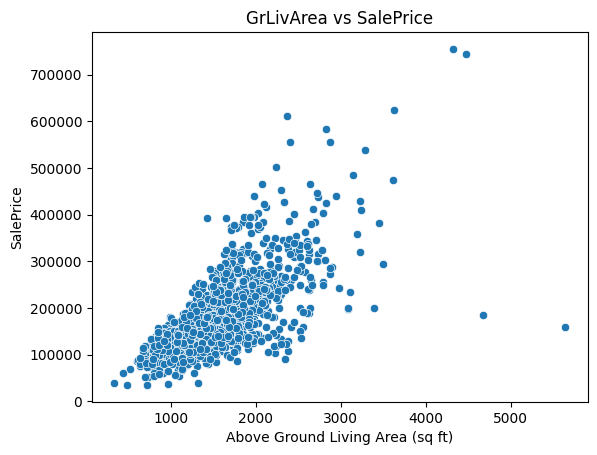

In [6]:
# Your code here - continuous numeric predictor
# Continuous numeric predictor: GrLivArea
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='GrLivArea', y='SalePrice', data=(df_cleaned))
plt.title('GrLivArea vs SalePrice')
plt.xlabel('Above Ground Living Area (sq ft)')
plt.ylabel('SalePrice')
plt.show()

### Discrete Numeric Predictor

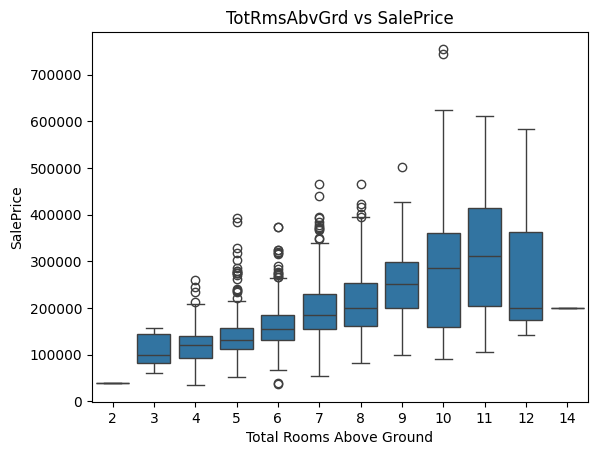

In [7]:
# Your code here - discrete numeric predictor
# Discrete numeric predictor: TotRmsAbvGrd
sns.boxplot(x='TotRmsAbvGrd', y='SalePrice', data=df_cleaned)
plt.title('TotRmsAbvGrd vs SalePrice')
plt.xlabel('Total Rooms Above Ground')
plt.ylabel('SalePrice')
plt.show()

### String Categorical Predictor

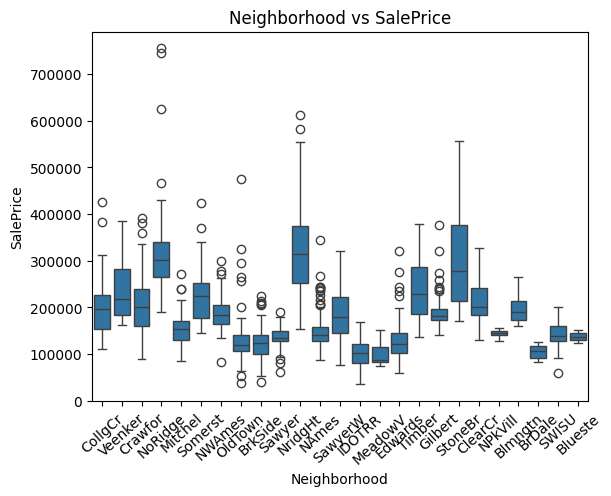

In [9]:
# Your code here - string categorical predictor
# String categorical predictor: Neighborhood
sns.boxplot(x='Neighborhood', y='SalePrice', data=df_cleaned)
plt.title('Neighborhood vs SalePrice')
plt.xlabel('Neighborhood')
plt.ylabel('SalePrice')
plt.xticks(rotation=42)
plt.show()

### Discrete Categorical Predictor

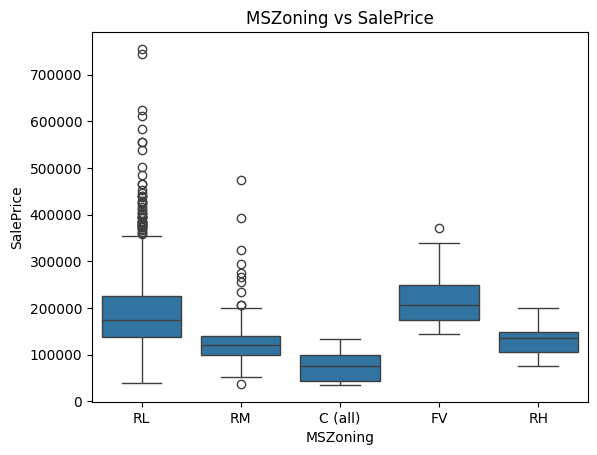

In [10]:
# Your code here - discrete categorical predictor
# Discrete categorical predictor: MSZoning
sns.boxplot(x='MSZoning', y='SalePrice', data=df_cleaned)
plt.title('MSZoning vs SalePrice')
plt.xlabel('MSZoning')
plt.ylabel('SalePrice')
plt.show()

## Step 3: Build a Multiple Regression Model with Your Chosen Predictors

Choose the best-looking 3 out of 4 predictors to include in your model.

Make sure that you one-hot encode your categorical predictor(s) (regardless of whether the current data type is a string or number) first.

In [11]:
# Your code here - prepare X and y, including one-hot encoding
# Step 1: Select predictors and target variable
X = df_cleaned[['GrLivArea', 'TotRmsAbvGrd', 'Neighborhood']]
y = df_cleaned['SalePrice']

# Step 2: Drop rows with missing values (if any remain)
data = pd.concat([X, y], axis=1).dropna()
X_clean = data[['GrLivArea', 'TotRmsAbvGrd', 'Neighborhood']]
y_clean = data['SalePrice']

# Step 3: One-hot encode the categorical variable 'Neighborhood'
X_encoded = pd.get_dummies(X_clean, columns=['Neighborhood'], drop_first=True)

# At this point, X_encoded is ready for modeling, and y_clean is your target
print(X_encoded.head())
print(y_clean.head())

    GrLivArea  TotRmsAbvGrd  Neighborhood_Blueste  Neighborhood_BrDale  \
Id                                                                       
1        1710             8                 False                False   
2        1262             6                 False                False   
3        1786             6                 False                False   
4        1717             7                 False                False   
5        2198             9                 False                False   

    Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
Id                                                                     
1                  False                 False                  True   
2                  False                 False                 False   
3                  False                 False                  True   
4                  False                 False                 False   
5                  False                 False   

In [12]:
# Your answer here - which category or categories were dropped?
# Check which categories exist
print(sorted(df_cleaned['Neighborhood'].unique()))

['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Veenker']


In [ ]:
# Your code here - build a regression model and display results
import statsmodels.api as sm

# Convert predictors and target to numeric
X_numeric = X_encoded.apply(pd.to_numeric, errors='coerce')
y_numeric = pd.to_numeric(y_clean, errors='coerce')

# Step 2: Concatenate and drop all rows with NaNs
combined = pd.concat([X_numeric, y_numeric.rename("target")], axis=1).dropna()

# Separate cleaned X and y
X_clean = combined.drop(columns=["target"])
y_cleaned = combined["target"]

# Ensure all data is float64 (not object)
X_clean = X_clean.astype("float64")
y_cleaned = y_cleaned.astype("float64")

# Add constant
X_const = sm.add_constant(X_clean)

# Fit the model
model = sm.OLS(y_cleaned, X_const).fit()

# Display results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     156.6
Date:                Wed, 30 Apr 2025   Prob (F-statistic):               0.00
Time:                        14:49:22   Log-Likelihood:                -17562.
No. Observations:                1460   AIC:                         3.518e+04
Df Residuals:                    1433   BIC:                         3.532e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 9.141e+04 

## Step 4: Create Partial Regression Plots for Features

For each feature of the regression above (including the dummy features), plot the partial regression.

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\patsy\compat.py", line 40, in call_and_wrap_exc
    return f(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\patsy\eval.py", line 179, in eval
    return eval(code, {}, VarLookupDict([inner_namespace] + self._namespaces))
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<string>", line 1, in <module>
  File "C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\patsy\eval.py", line 53, in __getitem__
    return d[key]
           ~^^^^^
  File "C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local

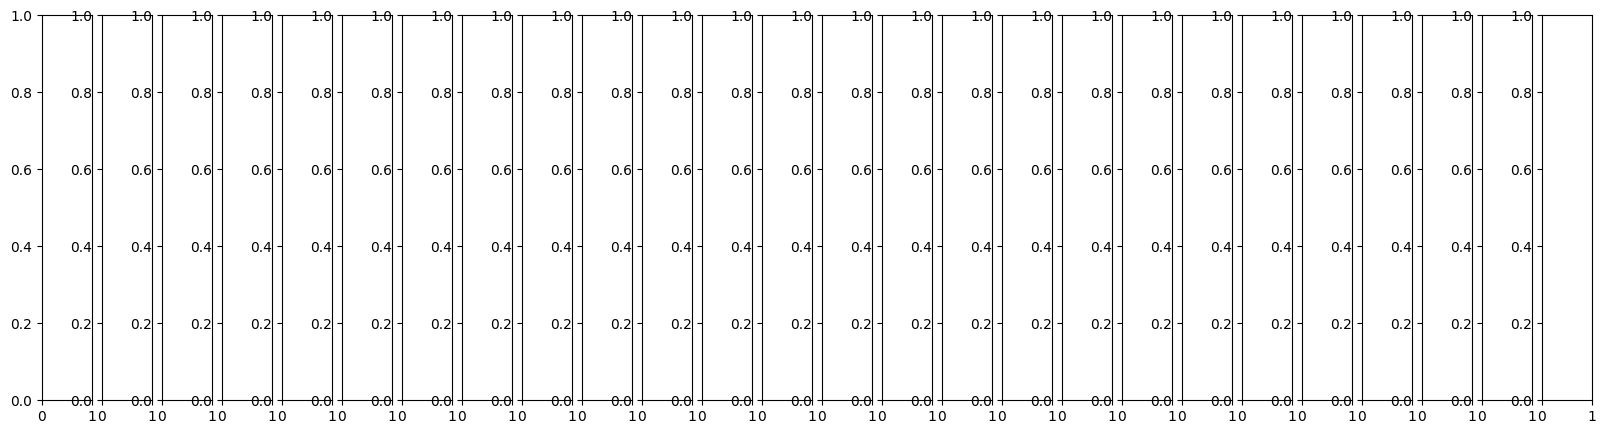

In [20]:
# Your code here - create partial regression plots
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import matplotlib.pyplot as plt

# Create partial regression plots for each feature (including dummy variables)
fig, axes = plt.subplots(nrows=1, ncols=len(X_clean.columns), figsize=(20, 5))

for i, feature in enumerate(X_clean.columns):
    # Plot partial regression for each feature
    sm.graphics.plot_partregress(endog='target', exog_i=feature, exog_ols=X_const, exog_others=X_const.drop(columns=[feature]), 
                                 fig=fig, ax=axes[i], obs_labels=False)

# Customize plot appearance
plt.tight_layout()
plt.show()

## Step 5: Calculate an Error-Based Metric

In addition to the adjusted R-Squared that we can see in the model summary, calculate either MAE or RMSE for this model.

In [22]:
# Your code here - calculate an error-based metric
# Ensure the constant term is included in the prediction data
X_clean_with_const = sm.add_constant(X_clean)

# Step 1: Get the predicted values from the model
y_pred = model.predict(X_clean_with_const)

# Step 2: Calculate the MAE (Mean Absolute Error)
mae = mean_absolute_error(y_cleaned, y_pred)

# Step 3: Calculate the RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_cleaned, y_pred))

# Display the results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 27258.906271764932
Root Mean Squared Error (RMSE): 40517.48781377071


## Step 6: Summarize Findings

Between the model results, partial regression plots, and error-based metric, what does this model tell you? What would your next steps be to improve the model?

In [23]:
# Your answer here
print(f"The Mean Absolute Error of approximately {mae} means that, on average, the model's predictions deviate from the true values by about {mae}. This metric gives a clear understanding of prediction accuracy.")
print(f"The Root Mean Square Error of approximately {rmse} is larger than the Mean Absolute Error, which suggests that there are some outliers or large errors that are disproportionately affecting the model's performance")

The Mean Absolute Error of approximately 27258.906271764932 means that, on average, the model's predictions deviate from the true values by about 27258.906271764932. This metric gives a clear understanding of prediction accuracy.
The Root Mean Square Error of approximately 40517.48781377071 is larger than the Mean Absolute Error, which suggests that there are some outliers or large errors that are disproportionately affecting the model's performance


## Level Up (Optional)

Try transforming X using scikit-learn _and_ fitting a scikit-learn linear regression as well. If there are any differences in the result, investigate them.

In [24]:
# Your code here
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clean)  # Standardize features

# Fit a scikit-learn linear regression model
sklearn_model = LinearRegression()
sklearn_model.fit(X_scaled, y_cleaned)

# Get predictions from the model
y_pred_sklearn = sklearn_model.predict(X_scaled)

# Calculate error metrics
mae_sklearn = mean_absolute_error(y_cleaned, y_pred_sklearn)
rmse_sklearn = np.sqrt(mean_squared_error(y_cleaned, y_pred_sklearn))

#Print results
print(f"MAE (Sklearn Linear Regression): {mae_sklearn}")
print(f"RMSE (Sklearn Linear Regression): {rmse_sklearn}")

MAE (Sklearn Linear Regression): 27258.90627176493
RMSE (Sklearn Linear Regression): 40517.48781377071


## Summary

In this lab, you practiced your knowledge of categorical variables on the Ames Housing dataset! Specifically, you practiced distinguishing numeric and categorical data. You then created dummy variables using one hot encoding in order to build a multiple regression model.